# Load Processed Data

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    average_precision_score,
    f1_score
)

from imblearn.over_sampling import SMOTE

# Load dataset
credit_df = pd.read_csv("../data/processed/creditcard_processed.csv")

X = credit_df.drop(columns=["Class"])
y = credit_df["Class"]

credit_df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Stratified Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)




# Baseline Model – Logistic Regression

In [4]:
lr_baseline = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr_baseline.fit(X_train, y_train)

y_pred_lr = lr_baseline.predict(X_test)
y_prob_lr = lr_baseline.predict_proba(X_test)[:, 1]



c:\Users\hp\Desktop\AI projects\fraud-detection-system_w5&6\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluation

In [5]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("PR-AUC:", average_precision_score(y_test, y_prob_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))


Confusion Matrix:
[[55202  1662]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

PR-AUC: 0.7289715378369028
F1-Score: 0.0972972972972973


# Ensemble Model – Random Forest (Hyperparameter Tuning (Basic))


In [6]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# Evaluation

In [7]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("PR-AUC:", average_precision_score(y_test, y_prob_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))


Confusion Matrix:
[[56849    15]
 [   18    80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

PR-AUC: 0.8291316735818198
F1-Score: 0.8290155440414507


# Cross-Validation (Stratified K-Fold)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pr_auc_scores = []
f1_scores = []

for train_idx, val_idx in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_tr, y_tr)

    y_val_prob = model.predict_proba(X_val)[:, 1]
    y_val_pred = model.predict(X_val)

    pr_auc_scores.append(average_precision_score(y_val, y_val_prob))
    f1_scores.append(f1_score(y_val, y_val_pred))

print("PR-AUC (mean ± std):", np.mean(pr_auc_scores), "±", np.std(pr_auc_scores))
print("F1 (mean ± std):", np.mean(f1_scores), "±", np.std(f1_scores))


# Model Comparison

In [9]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt


# Logistic Regression
y_prob_lr = lr_baseline.predict_proba(X_test)[:, 1]

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# Precision–Recall Curve Comparison (Credit Card)

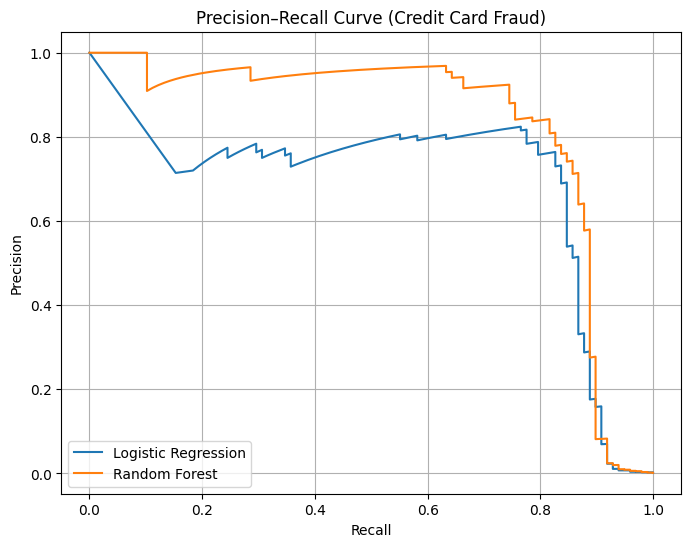

In [10]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_rf, precision_rf, label="Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Credit Card Fraud)")
plt.legend()
plt.grid(True)
plt.show()


# ROC Curve Comparison (Credit Card)

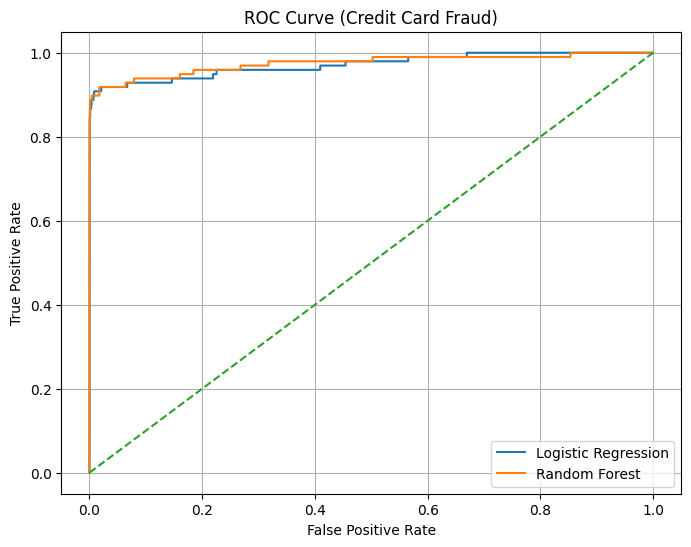

In [11]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Credit Card Fraud)")
plt.legend()
plt.grid(True)
plt.show()


# Numeric Comparison Table (Credit Card)

In [12]:
comparison_credit = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "PR-AUC": [
        average_precision_score(y_test, y_prob_lr),
        average_precision_score(y_test, y_prob_rf)
    ],
    "F1-Score": [
        f1_score(y_test, lr_baseline.predict(X_test)),
        f1_score(y_test, rf_model.predict(X_test))
    ]
})

comparison_credit


,Model,PR-AUC,F1-Score
0,Logistic Regression,0.670864,0.075408
1,Random Forest,0.829132,0.829016


# Feature Importance (Baseline Explanation)

In [13]:
importance_cc = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)


In [1]:
plt.figure(figsize=(8, 6))
plt.barh(importance_cc.head(10)["feature"],
         importance_cc.head(10)["importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Credit Card RF)")
plt.xlabel("Importance")
plt.show()
print("Feature importances from Random Forest model:")
print(importance_cc)



NameError: name 'plt' is not defined

# SHAP Analysis

In [ ]:
import shap
shap.initjs()


# Create SHAP Explainer

In [ ]:
explainer_cc = shap.TreeExplainer(rf_model)
shap_values_cc = explainer_cc.shap_values(X_test)


# SHAP Summary Plot (GLOBAL EXPLANATION)

In [ ]:
shap.summary_plot(
    shap_values_cc[1],
    X_test,
    feature_names=X_test.columns
)
